## Gender Balance at the Olympic Games

### Goals: 
The goal of this project is to conduct a EDA on Historical Data of the Olympic Games, and see how much women's participation has improved over the years and also find out sports and countries driving women's participation in the games.

## Loading Libraries

In [18]:
library('tidyverse')
library('ggplot2')
library('lubridate') #load relevant libraries.

## Loading Datasets

In [19]:
olympics_1 <- read.csv('../input/historical-olympics-data/athlete_events.csv')
olympics_2 <- read.csv('../input/historical-olympics-data/athletes.csv') #load two data sets into R studio.

In [20]:
head(olympics_1, 5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA


In [21]:
head(olympics_2, 5)

,name,short_name,gender,Age,birth_date,birth_place,birth_country,country,country_code,discipline,⋯,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,AALERUD Katrine,AALERUD K,Female,26,12/4/1994,VESTBY,Norway,Norway,NOR,Cycling Road,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,4/29/2021
2,ABAD Nestor,ABAD N,Male,28,3/29/1993,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
3,ABAGNALE Giovanni,ABAGNALE G,Male,26,1/11/1995,GRAGNANO,Italy,Italy,ITA,Rowing,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
4,ABALDE Alberto,ABALDE A,Male,25,12/15/1995,FERROL,Spain,Spain,ESP,Basketball,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
5,ABALDE Tamara,ABALDE T,Female,32,2/6/1989,VIGO,Spain,Spain,ESP,Basketball,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,


## Data Cleaning

In [22]:
olympics_2 <- olympics_2 %>%
  add_column(ID='NA', .before = 'name')
olympics_2 <- 
  olympics_2 %>%
  rename(Name=name) %>%
  rename(Team=country) %>%
  rename(NOC=country_code) %>%
  rename(Sport=discipline) # Rename columns to match first data set.

In [23]:
olympics_2 <- 
  olympics_2 %>%
  add_column(Sex='NA', .before = 'gender')
olympics_2$Sex <- ifelse(olympics_2$gender=='Male', 'M', 'F')

In [24]:
olympics_2 <- 
  olympics_2 %>%
  add_column(Games='2020 Summer', .after = 'NOC') %>%
  add_column(Year='2021', .after = 'Games') %>%
  add_column(Season='Summer', .after = 'Year') %>%
  add_column(City='Tokyo', .after = 'Season')# Insert columns to match the format of the first data set.

In [25]:
olympics_2 <- 
  olympics_2 %>%
  add_column(Height='NA', .after = 'Age') %>%
  add_column(Weight='NA', .after = 'Height') %>%
  add_column(Event='NA', .after = 'Sport') %>%
  add_column(Medal='NA', .after = 'Event') # Insert columns to match the format of the first data set.

In [26]:
olympics_2$ID <- as.numeric(olympics_2$ID)  # cast ID column as numeric so it can stack properly.
is.numeric(olympics_2$ID)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] TRUE

In [27]:
olympics_2 <- 
    select(olympics_2, ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal) #select valid columns to merge to the first data set.

In [28]:
olympics_2$Height <- as.numeric(olympics_2$Height)  # cast Height column as numeric so it can stack properly.
olympics_2$Weight <- as.numeric(olympics_2$Weight) # cast Weight column as numeric so it can stack properly.
olympics_2$Year <- as.numeric(olympics_2$Year) # cast Year column as numeric so it can stack properly.

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


## Binding Datasets

In [29]:
olympics_main <- bind_rows(olympics_1, olympics_2) #bind two data sets to form a single table.
head(olympics_main, 5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA


## Filtering out Summer Olympics

In [30]:
olympics_main <- olympics_main %>%
  filter(Season == 'Summer') #filter Olympics data for the summer period, since the analysis is based off of the summer Olympics.
head(olympics_main, 5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168,NA,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NA


In [31]:
str(olympics_main)

'data.frame':	234208 obs. of  15 variables:
 $ ID    : num  1 2 3 4 8 8 10 12 13 13 ...
 $ Name  : chr  "A Dijiang" "A Lamusi" "Gunnar Nielsen Aaby" "Edgar Lindenau Aabye" ...
 $ Sex   : chr  "M" "M" "M" "M" ...
 $ Age   : int  24 23 24 34 18 18 26 31 30 34 ...
 $ Height: num  180 170 NA NA 168 168 NA 172 159 159 ...
 $ Weight: num  80 60 NA NA NA NA NA 70 55.5 55.5 ...
 $ Team  : chr  "China" "China" "Denmark" "Denmark/Sweden" ...
 $ NOC   : chr  "CHN" "CHN" "DEN" "DEN" ...
 $ Games : chr  "1992 Summer" "2012 Summer" "1920 Summer" "1900 Summer" ...
 $ Year  : num  1992 2012 1920 1900 1932 ...
 $ Season: chr  "Summer" "Summer" "Summer" "Summer" ...
 $ City  : chr  "Barcelona" "London" "Antwerpen" "Paris" ...
 $ Sport : chr  "Basketball" "Judo" "Football" "Tug-Of-War" ...
 $ Event : chr  "Basketball Men's Basketball" "Judo Men's Extra-Lightweight" "Football Men's Football" "Tug-Of-War Men's Tug-Of-War" ...
 $ Medal : chr  NA NA NA "Gold" ...


## Data Aggregation

In [44]:
olympics_sports_male_female <- aggregate(olympics_main$Year~olympics_main$Sex + olympics_main$Sport, FUN = length)
head(aggregate(olympics_main$Year~olympics_main$Sex + olympics_main$Sport, FUN = length), 10)

,olympics_main$Sex,olympics_main$Sport,olympics_main$Year
,<chr>,<chr>,<int>
1,F,,159
2,F,3x3 Basketball,32
3,M,3x3 Basketball,32
4,M,Aeronautics,1
5,F,Alpinism,1
6,M,Alpinism,3
7,F,Archery,1079
8,M,Archery,1382
9,F,Art Competitions,377


In [46]:
chart_1 <- olympics_sports_male_female %>%
  rename(Sex=`olympics_main$Sex`)%>%
  filter(`olympics_main$Sport` =='Artistic Gymnastics'
         | `olympics_main$Sport` == 'Art Competitions'
         |  `olympics_main$Sport` == 'Athletics'
         |  `olympics_main$Sport` == 'Basketball'
         | `olympics_main$Sport` == 'Boxing'
         | `olympics_main$Sport` == 'Diving'
         | `olympics_main$Sport` == 'Figure Skating'
         | `olympics_main$Sport` == 'Weightlifting'
         | `olympics_main$Sport` == 'Triathlon'
         | `olympics_main$Sport` == 'Tennis'
         | `olympics_main$Sport` == 'Taekwondo'
         | `olympics_main$Sport` == 'Gymnastics'
         | `olympics_main$Sport` == 'Surfing'
         | `olympics_main$Sport` == 'Football'
         | `olympics_main$Sport` == 'Skateboarding'
         | `olympics_main$Sport` == 'Handball'
         | `olympics_main$Sport` == 'Hockey'
         | `olympics_main$Sport` == 'Sailing'
         | `olympics_main$Sport` == 'Swimming'
         | `olympics_main$Sport` == 'Shooting'
         | `olympics_main$Sport` == 'Volleyball'
         | `olympics_main$Sport` == 'Water Polo'
         | `olympics_main$Sport` == 'Wrestling')
head(chart_1, 5)

,Sex,olympics_main$Sport,olympics_main$Year
,<chr>,<chr>,<int>
1,F,Art Competitions,377
2,M,Art Competitions,3201
3,F,Artistic Gymnastics,98
4,M,Artistic Gymnastics,95
5,F,Athletics,12622


## Gender Balance Chart By Various Sports

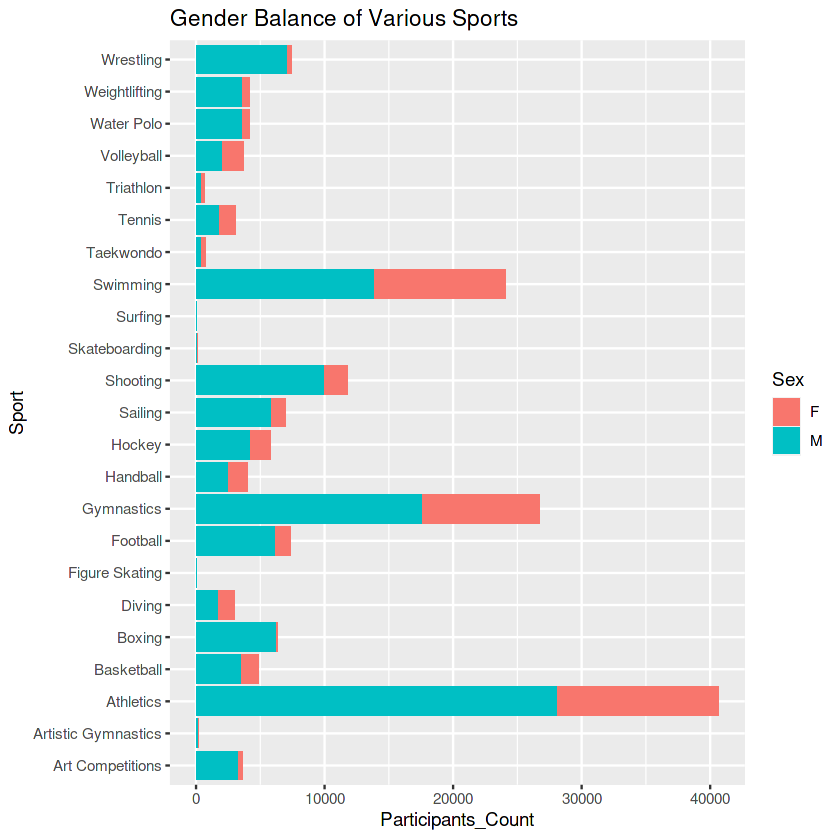

In [47]:
chart_1 %>%
  ggplot(aes(x = `olympics_main$Sport`,y = `olympics_main$Year`, fill = Sex)) + geom_bar(stat = 'identity') + coord_flip() + labs(x = 'Sport', y = 'Participants_Count', title = 'Gender Balance of Various Sports', color='Sex') 


## Female Participation Data

In [48]:
olympics_female <- 
  olympics_main %>% 
  filter(olympics_main$Sex =='F') #filter out only female data to perform analysis.
head(olympics_female, 5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168,NA,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NA
2,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168,NA,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NA
3,13,Minna Maarit Aalto,F,30,159,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NA
4,13,Minna Maarit Aalto,F,34,159,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NA
5,21,Ragnhild Margrethe Aamodt,F,27,163,NA,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


In [49]:
number_of_female_yearly <- 
  aggregate(olympics_female$Sex~olympics_female$Year + olympics_female$Season, FUN = length)
head(number_of_female_yearly, 10)

,olympics_female$Year,olympics_female$Season,olympics_female$Sex
,<dbl>,<chr>,<int>
1,1900,Summer,33
2,1904,Summer,16
3,1906,Summer,11
4,1908,Summer,47
5,1912,Summer,87
6,1920,Summer,134
7,1924,Summer,244
8,1928,Summer,404
9,1932,Summer,347


## Female Participation Chart

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



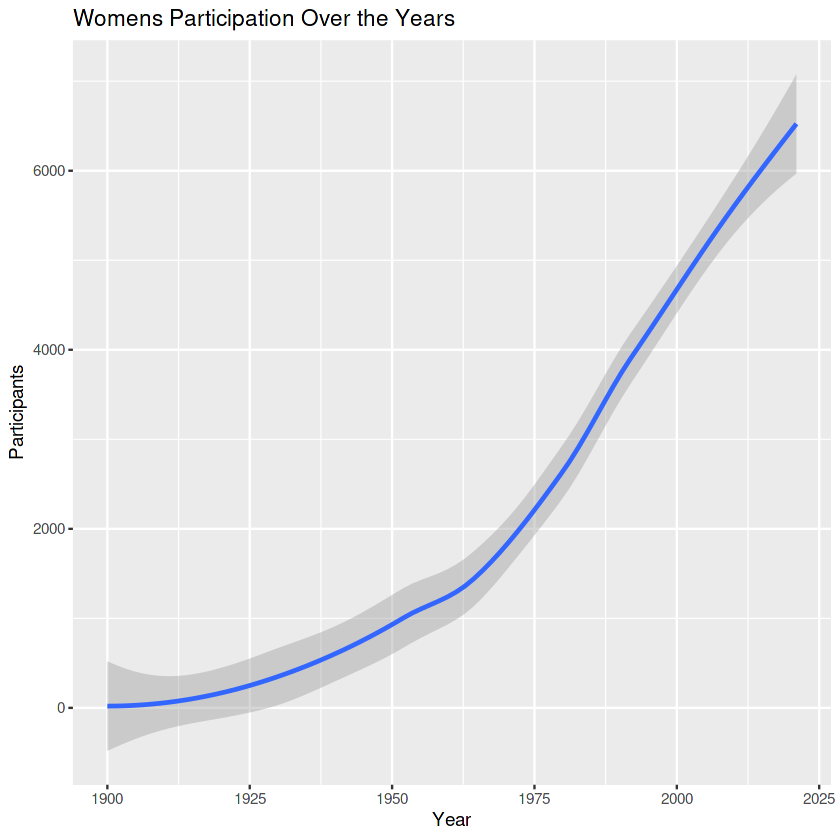

In [50]:
number_of_female_yearly %>%
  ggplot(aes(x = `olympics_female$Year`, y = `olympics_female$Sex`, fill = `olympics_female$Year`)) + geom_smooth() + 
  labs(x = 'Year', y = 'Participants', title = 'Womens Participation Over the Years')

## Male Participation Data

In [51]:
olympics_male <- 
  olympics_main %>%
  filter(olympics_main$Sex == 'M')  #filter out only male data to perform analysis.
head(olympics_male, 5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,10,"Einar Ferdinand ""Einari"" Aalto",M,26,NA,NA,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NA


In [52]:
number_of_male_yearly <- 
  aggregate(olympics_male$Sex~olympics_male$Year + olympics_male$Season, FUN = length)
head(number_of_male_yearly, 5)

,olympics_male$Year,olympics_male$Season,olympics_male$Sex
,<dbl>,<chr>,<int>
1,1896,Summer,380
2,1900,Summer,1903
3,1904,Summer,1285
4,1906,Summer,1722
5,1908,Summer,3054


## Male Participation Charts

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



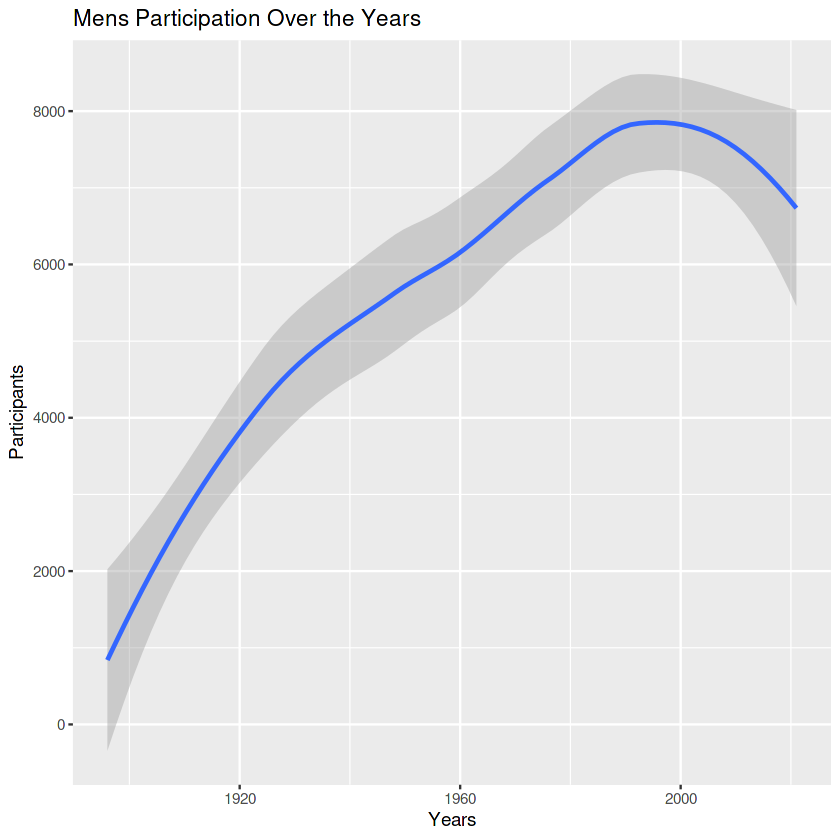

In [54]:
number_of_male_yearly %>%
  ggplot(aes(x = `olympics_male$Year`, y = `olympics_male$Sex`, fill = `olympics_male$Year`)) + geom_smooth() + labs(x = 'Years', y = 'Participants', title = 'Mens Participation Over the Years')

## Female Participation by Country

In [53]:
number_of_female_yearly_2 <- 
  aggregate(olympics_female$Sex~olympics_female$Team, FUN = length)
head(number_of_female_yearly_2, 5)

,olympics_female$Team,olympics_female$Sex
,<chr>,<int>
1,Afghanistan,6
2,Albania,28
3,Algeria,103
4,American Samoa,8
5,Ancora,1


## Female Participation Charts by Country

Warning message:
“Use of `number_of_female_yearly_2_1$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_1$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


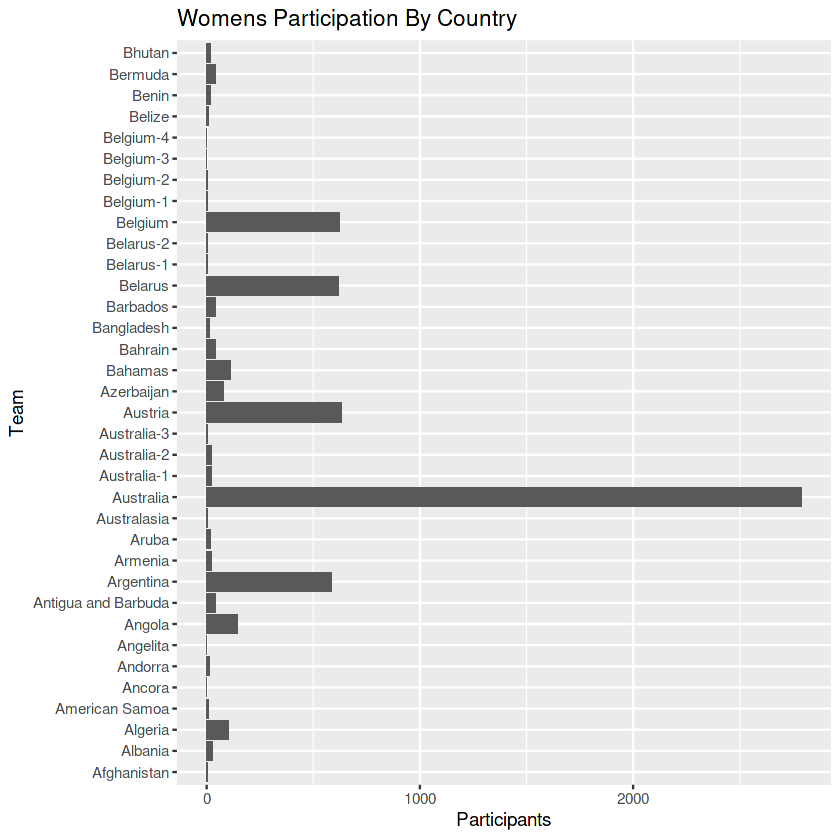

In [55]:
number_of_female_yearly_2_1 <- number_of_female_yearly_2[1:35,]
number_of_female_yearly_2_1 %>%
  ggplot(aes(x = number_of_female_yearly_2_1$`olympics_female$Team`, y = number_of_female_yearly_2_1$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip() + labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')


Warning message:
“Use of `number_of_female_yearly_2_2$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_2$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


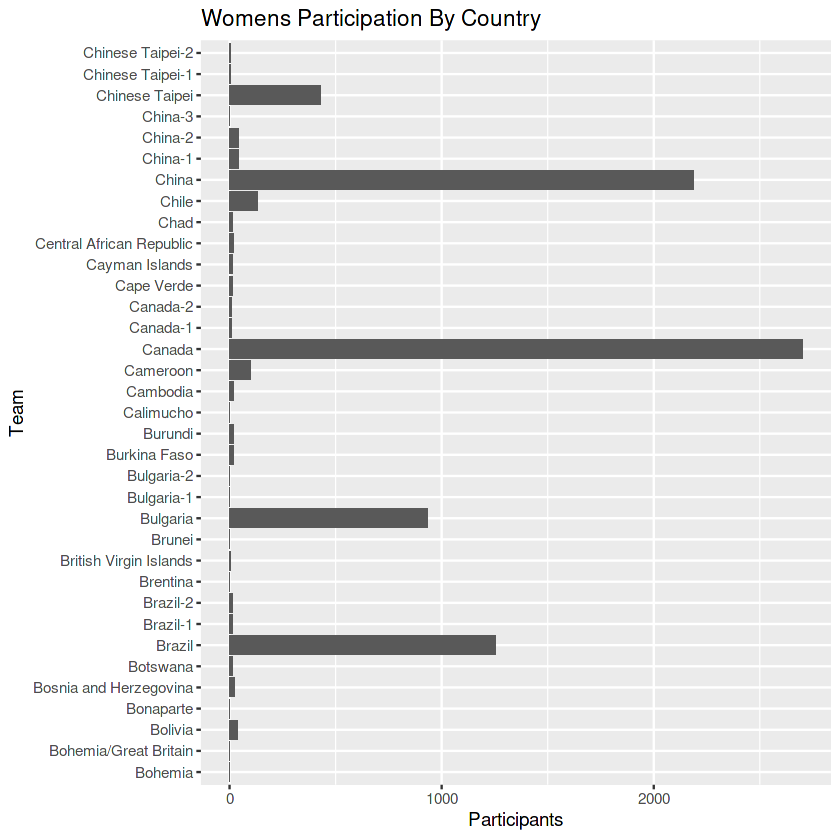

In [56]:
number_of_female_yearly_2_2 <- number_of_female_yearly_2[36:70,]
number_of_female_yearly_2_2 %>%
  ggplot(aes(x = number_of_female_yearly_2_2$`olympics_female$Team`, y = number_of_female_yearly_2_2$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')


Warning message:
“Use of `number_of_female_yearly_2_3$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_3$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


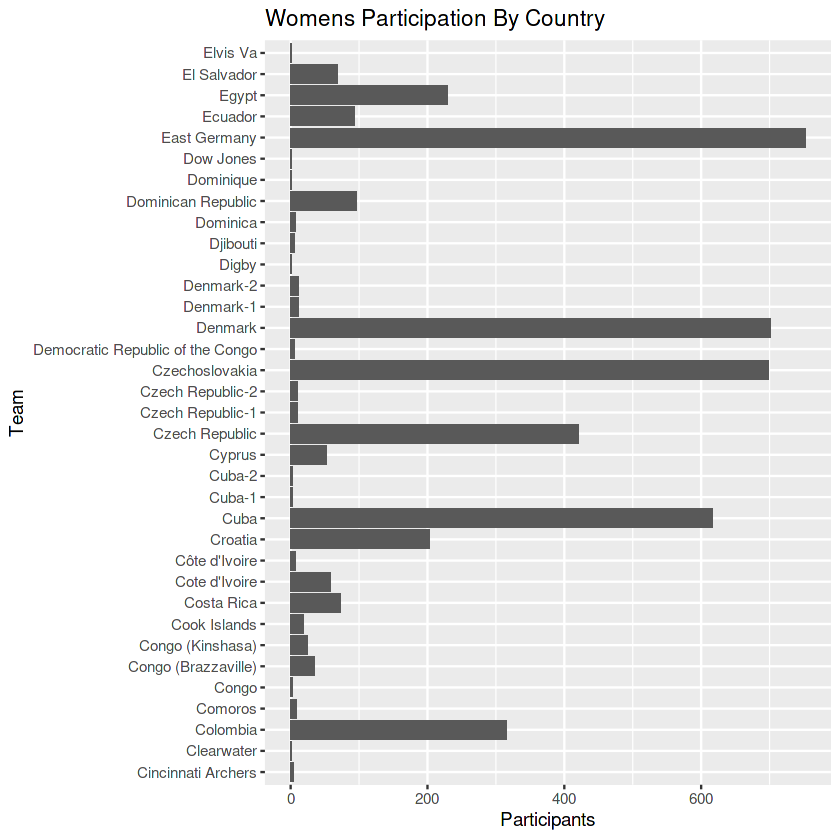

In [57]:
number_of_female_yearly_2_3 <- number_of_female_yearly_2[71:105,]
number_of_female_yearly_2_3 %>%
  ggplot(aes(x = number_of_female_yearly_2_3$`olympics_female$Team`, y = number_of_female_yearly_2_3$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')


Warning message:
“Use of `number_of_female_yearly_2_4$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_4$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


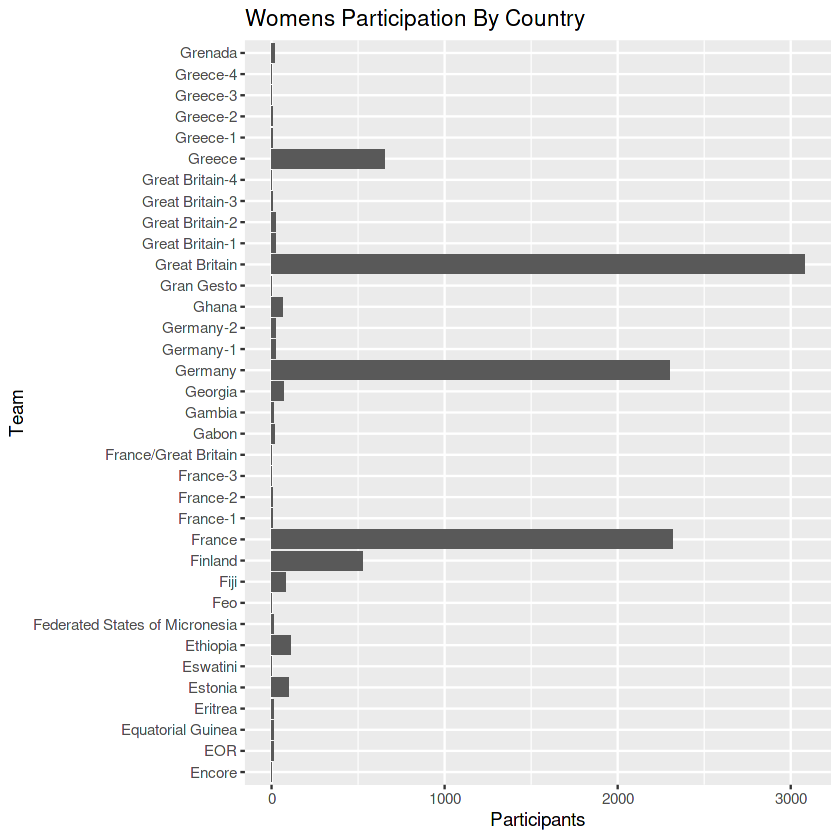

In [58]:
number_of_female_yearly_2_4 <- number_of_female_yearly_2[106:140,]
number_of_female_yearly_2_4 %>%
  ggplot(aes(x = number_of_female_yearly_2_4$`olympics_female$Team`, y = number_of_female_yearly_2_4$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

Warning message:
“Use of `number_of_female_yearly_2_6$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_6$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


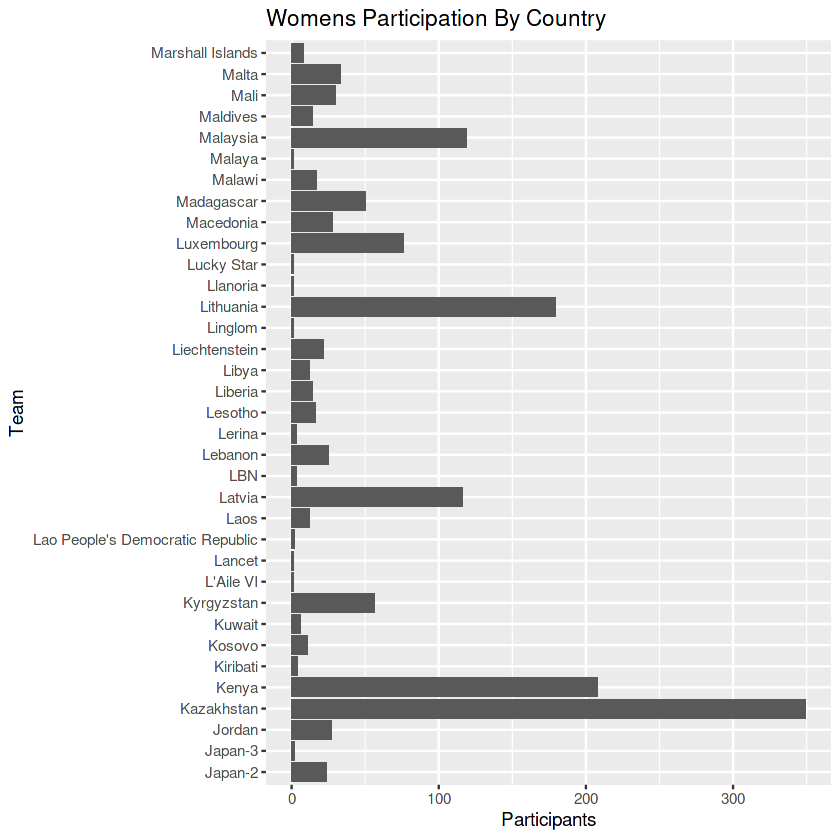

In [59]:
number_of_female_yearly_2_6 <- number_of_female_yearly_2[176:210,]
number_of_female_yearly_2_6 %>%
  ggplot(aes(x = number_of_female_yearly_2_6$`olympics_female$Team`, y = number_of_female_yearly_2_6$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

Warning message:
“Use of `number_of_female_yearly_2_5$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_5$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


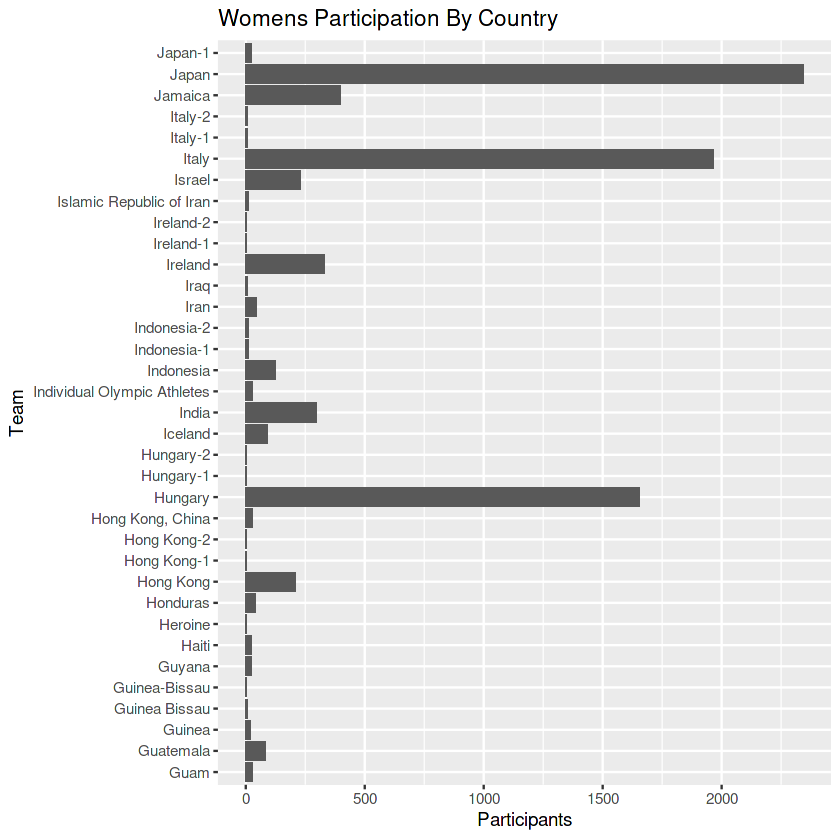

In [60]:
number_of_female_yearly_2_5 <- number_of_female_yearly_2[141:175,]
number_of_female_yearly_2_5 %>%
  ggplot(aes(x = number_of_female_yearly_2_5$`olympics_female$Team`, y = number_of_female_yearly_2_5$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

Warning message:
“Use of `number_of_female_yearly_2_7$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_7$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


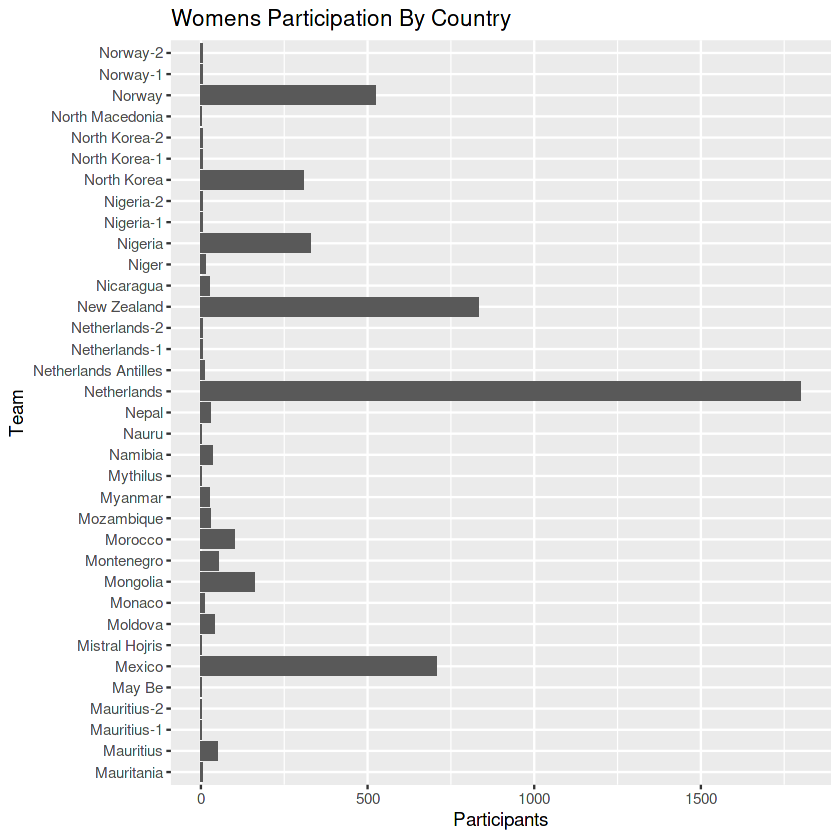

In [61]:
number_of_female_yearly_2_7 <- number_of_female_yearly_2[211:245,]
number_of_female_yearly_2_7 %>%
  ggplot(aes(x = number_of_female_yearly_2_7$`olympics_female$Team`, y = number_of_female_yearly_2_7$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

Warning message:
“Use of `number_of_female_yearly_2_8$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_8$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


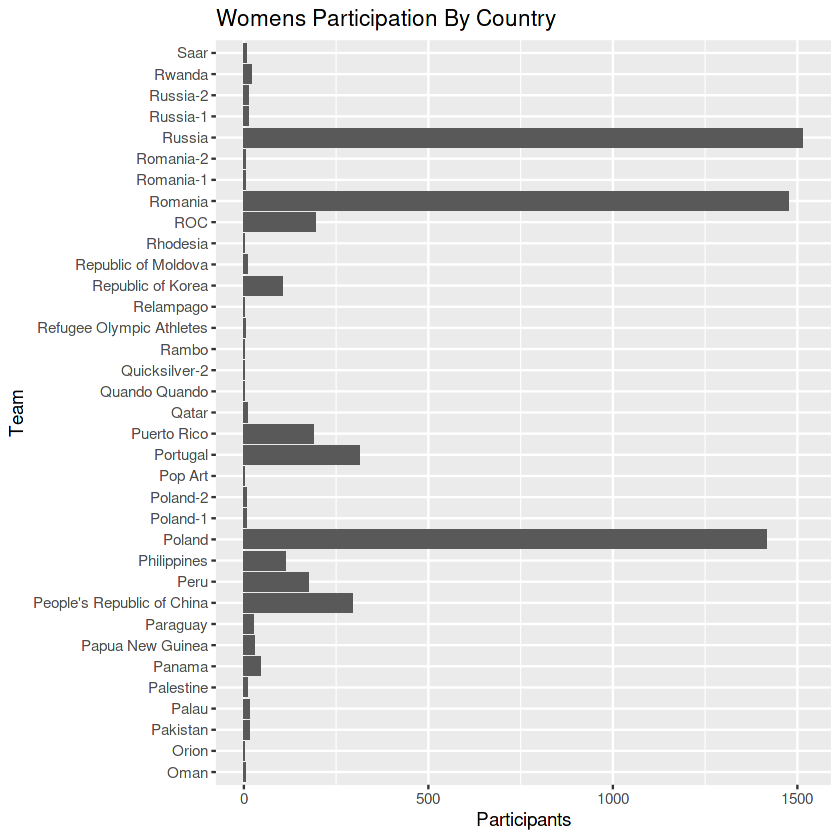

In [62]:
number_of_female_yearly_2_8 <- number_of_female_yearly_2[246:280,]
number_of_female_yearly_2_8 %>%
  ggplot(aes(x = number_of_female_yearly_2_8$`olympics_female$Team`, y = number_of_female_yearly_2_8$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

Warning message:
“Use of `number_of_female_yearly_2_9$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_9$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


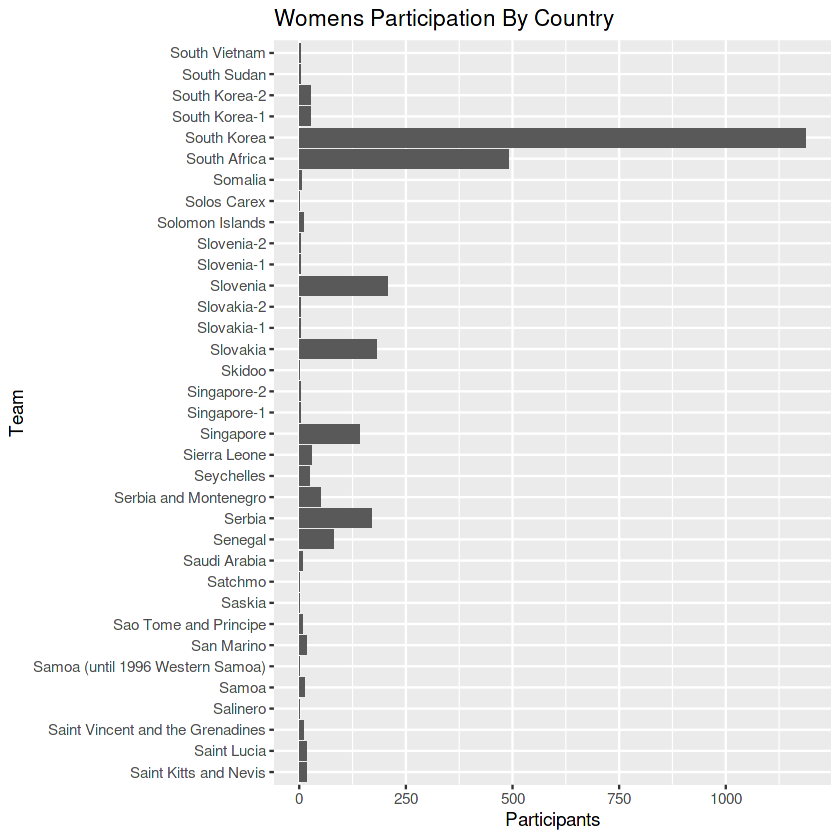

In [63]:
number_of_female_yearly_2_9 <- number_of_female_yearly_2[281:315,]
number_of_female_yearly_2_9 %>%
  ggplot(aes(x = number_of_female_yearly_2_9$`olympics_female$Team`, y = number_of_female_yearly_2_9$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

Warning message:
“Use of `number_of_female_yearly_2_10$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_10$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


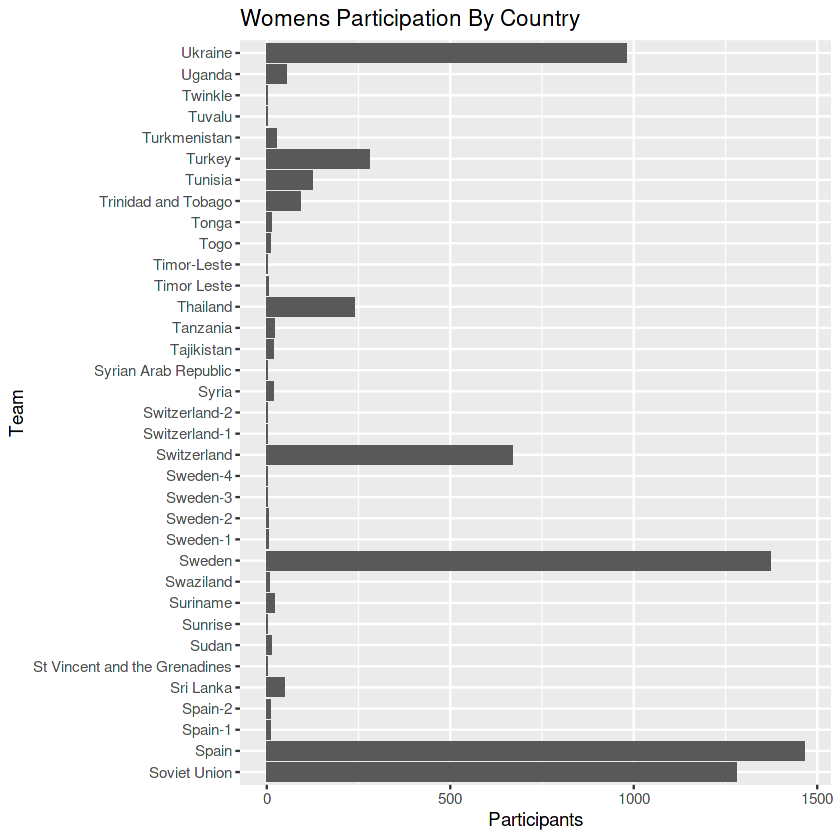

In [64]:
number_of_female_yearly_2_10 <- number_of_female_yearly_2[316:350,]
number_of_female_yearly_2_10 %>%
  ggplot(aes(x = number_of_female_yearly_2_10$`olympics_female$Team`, y = number_of_female_yearly_2_10$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

Warning message:
“Use of `number_of_female_yearly_2_11$`olympics_female$Team`` is discouraged. Use `olympics_female$Team` instead.”
Warning message:
“Use of `number_of_female_yearly_2_11$`olympics_female$Sex`` is discouraged. Use `olympics_female$Sex` instead.”


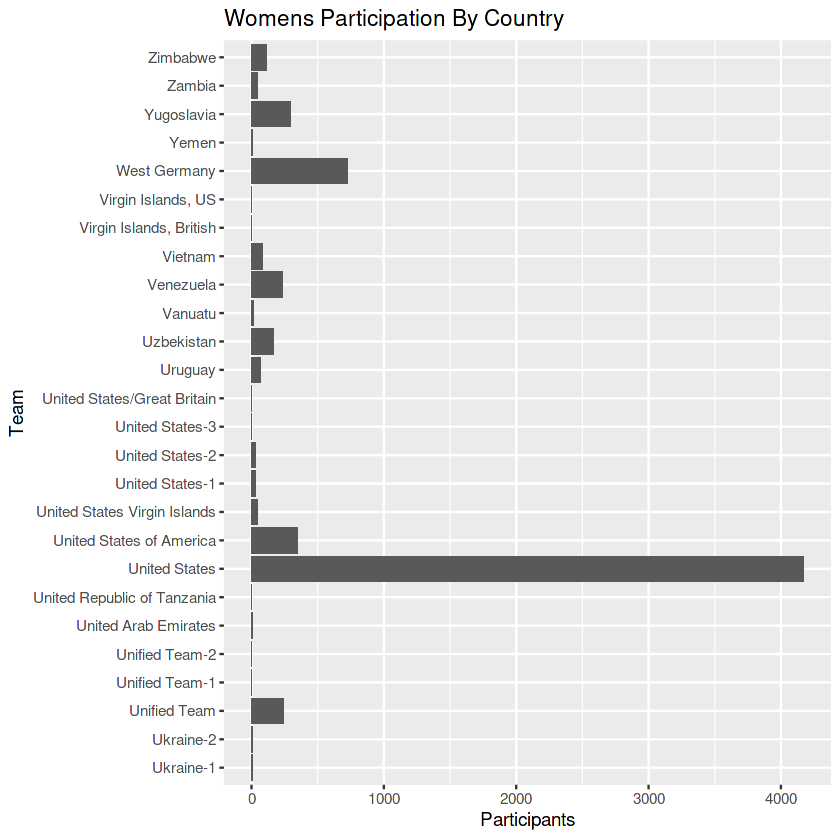

In [65]:
number_of_female_yearly_2_11 <- number_of_female_yearly_2[351:376,]
number_of_female_yearly_2_11 %>%
  ggplot(aes(x = number_of_female_yearly_2_11$`olympics_female$Team`, y = number_of_female_yearly_2_11$`olympics_female$Sex`)) + geom_bar(stat = 'identity') + coord_flip()+ labs(x = 'Team', y = 'Participants', title = 'Womens Participation By Country')

### Conclusion:
The Tokyo 2020 Olympics Games was the first ever gender-balanced Olympic Games, Athletics, Swimming, and Gymnastics are the major sports  driving more participation from women at the Games. Countries like the United States of America, Great Britain, France, Netherlands, Japan, China, Italy and Germany are the leading countries when it comes to women's participation in the Games.